# Atividade 01 - Parte 01 - Inventário de emissões

## Alunas: Suelen Oliveira, Vitoria Borges e Yasmin Sakamoto

### Empreendimento: Guararapes (painéis de MDF)
### Cidade: Caçador SC

##### Utilizamos o capítulo 10.6.3 da AP42, pois o empreendimento tem como produto painéis de MDF
##### https://www.epa.gov/sites/default/files/2020-10/documents/c10s0603.pdf

##### Os fatores de emissão estavam em diferentes unidades, mas foram todos convertidos para kg/m³ utilizando espessura = 0,018 m e densidade = 700 kg/m³



In [1]:
# importando as bibliotecas que serão utilizadas
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# Diretório para o csv
path = r"C:\UFSC\ENS410064\venv\Scripts\tabelas\FE"
print(path)

# Indicando nome do arquivo
chapterNumer = 10
subChapter = 3
subsub = 6
file = 'chpt_'+str(chapterNumer)+'_'+str(subChapter)+'_'+str(subsub)+'.csv'
print(file)

# Abrindo arquivo utilizando o Pandas
#uso do encoding latin1 porque ele não estava identificando sozinho
fe = pd.read_csv(path+'\\'+file, encoding = 'latin1')
fe

#Trocando ND por NaN
fe['PM']=pd.to_numeric(fe['PM'], errors='coerce')
fe['PM-10']=pd.to_numeric(fe['PM-10'], errors='coerce')
fe['NOX']=pd.to_numeric(fe['NOX'], errors='coerce')
fe['CO']=pd.to_numeric(fe['CO'], errors='coerce')
fe['VOC']=pd.to_numeric(fe['VOC'], errors='coerce')
fe

C:\UFSC\ENS410064\venv\Scripts\tabelas\FE
chpt_10_3_6.csv


,Source,PM,PM-10,NOX,CO,VOC
0,"Tube dryer, direct wood-fired, blowline blend,...",3.6400,0.560,NaN,1.40000,2.350000
1,"Hot press, UF resin",0.0468,0.039,0.0078,0.00884,0.208000
2,"Former with blowline blend, UF resin",NaN,NaN,NaN,NaN,0.020000
3,Sander,NaN,NaN,NaN,NaN,0.017967
4,Saw and hogger,NaN,NaN,NaN,NaN,0.035389


##### Nossa taxa de atividade é 1,140 milhões de m³/ano (Fonte: Guararapes)

In [2]:
atividade = 1140000
#transformando para m³/s
atv = atividade/(60*60*24*365)
print (atv)
#fazendo uma cópia do df de fator de emissão
fe2=fe
print(fe2)
#multiplicando o FE pela atividade para descobrir a emissão e por 1000 para transformar em g/s
fe2['PM'] = fe2['PM']*atv*1000
fe2['PM-10'] = fe2['PM-10']*atv*1000
fe2['NOX'] = fe2['NOX']*atv*1000
fe2['CO'] = fe2['CO']*atv*1000
fe2['VOC'] = fe2['VOC']*atv*1000
fe2

0.03614916286149163
                                              Source      PM  PM-10     NOX  \
0  Tube dryer, direct wood-fired, blowline blend,...  3.6400  0.560     NaN   
1                                Hot press, UF resin  0.0468  0.039  0.0078   
2               Former with blowline blend, UF resin     NaN    NaN     NaN   
3                                             Sander     NaN    NaN     NaN   
4                                     Saw and hogger     NaN    NaN     NaN   

        CO       VOC  
0  1.40000  2.350000  
1  0.00884  0.208000  
2      NaN  0.020000  
3      NaN  0.017967  
4      NaN  0.035389  


,Source,PM,PM-10,NOX,CO,VOC
0,"Tube dryer, direct wood-fired, blowline blend,...",131.582953,20.243531,NaN,50.608828,84.950533
1,"Hot press, UF resin",1.691781,1.409817,0.281963,0.319559,7.519026
2,"Former with blowline blend, UF resin",NaN,NaN,NaN,NaN,0.722983
3,Sander,NaN,NaN,NaN,NaN,0.649480
4,Saw and hogger,NaN,NaN,NaN,NaN,1.279279


1
2
3
4
5


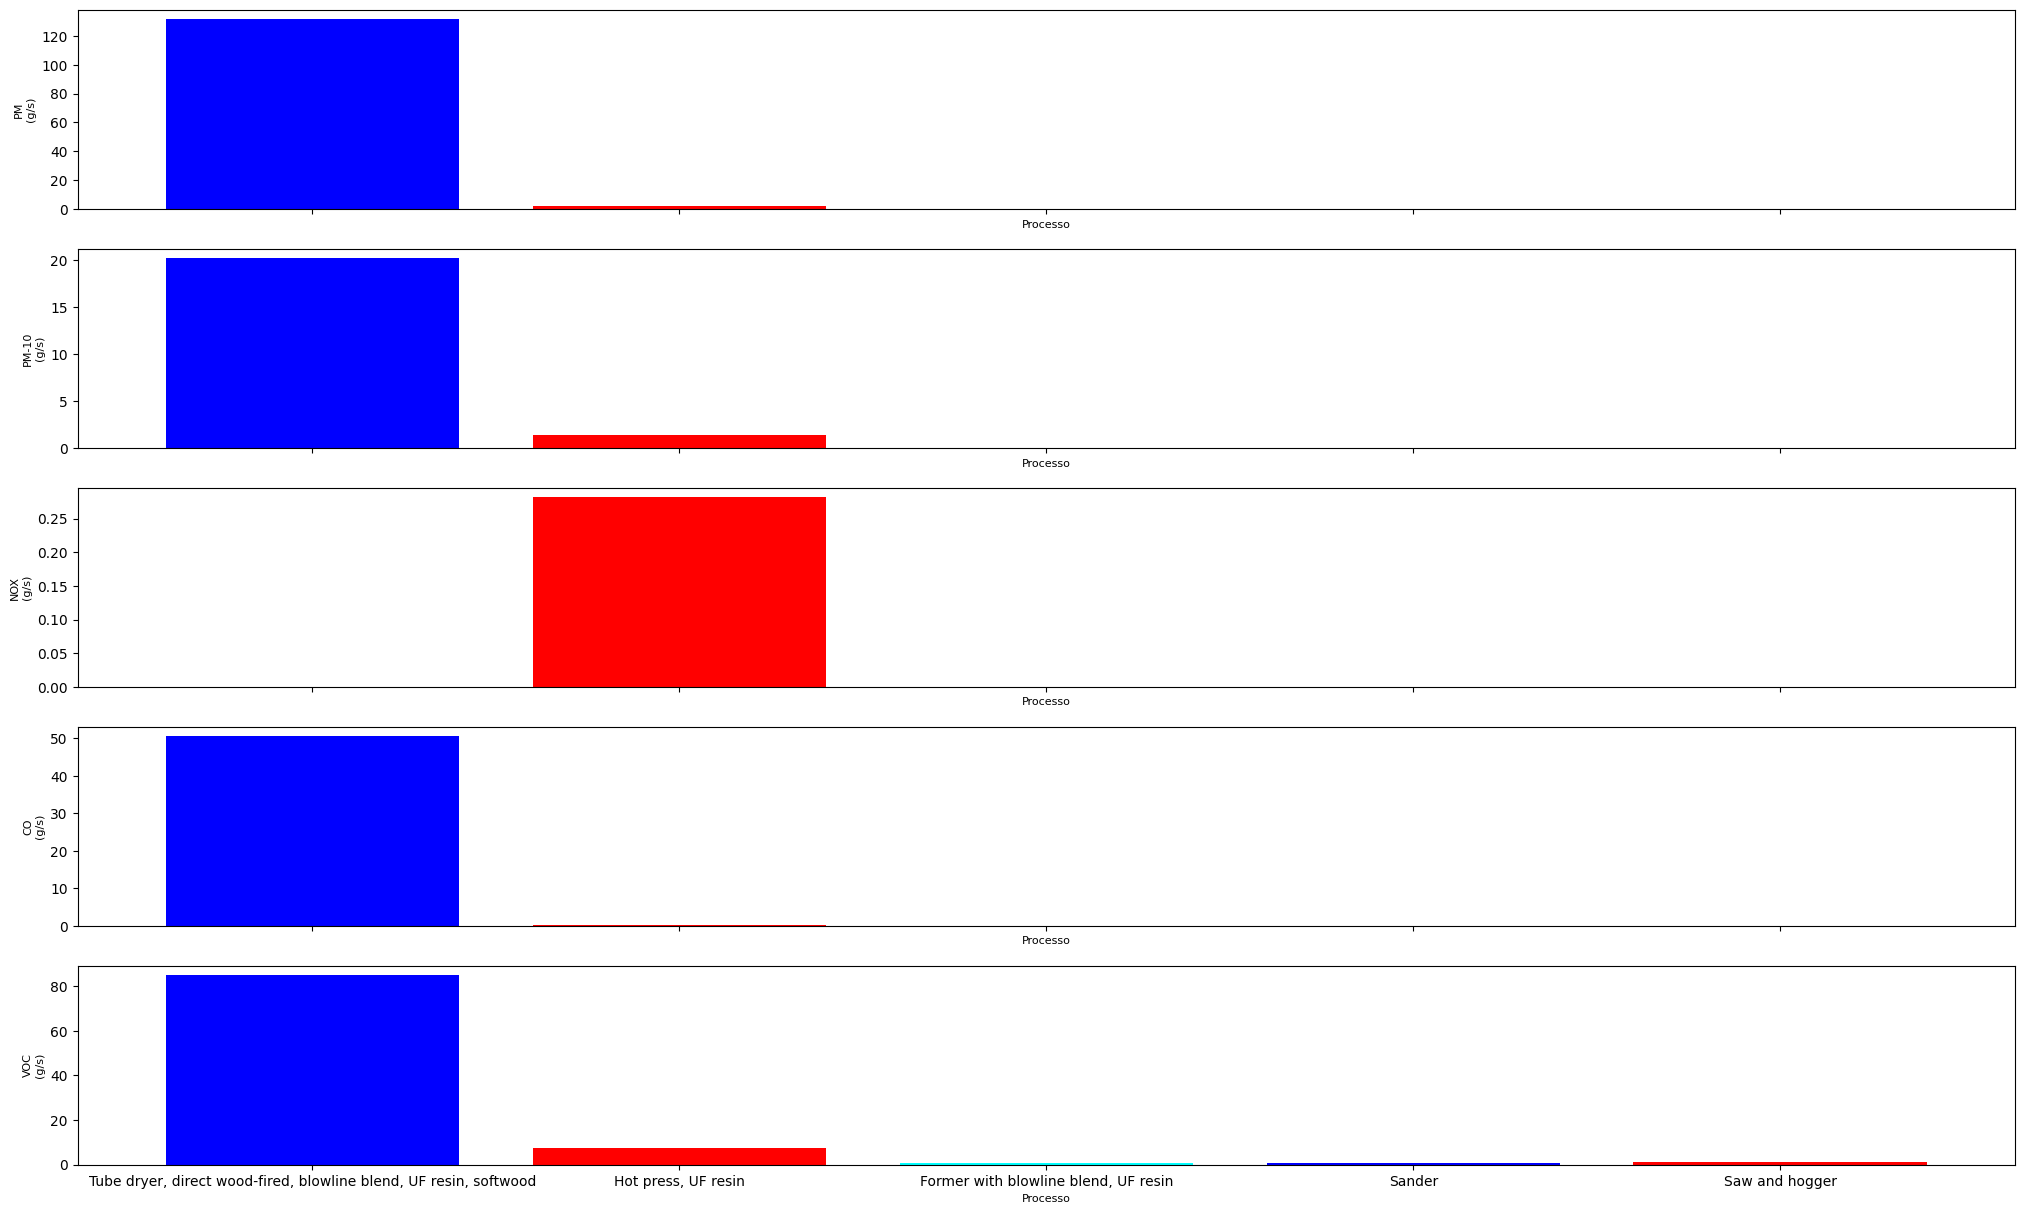

In [3]:
# Fazendo o plot dos dados do dataframe
# Subplots com número de linhas igual ao número de poluentes
fig,ax = plt.subplots(len(fe2.columns)-1,1,sharex = True,figsize=(25, 15))

# Loop para preencher o subplot com os gráficos de barra
for ii in range(1,len(fe2.columns)):
    print(ii)
    ax[ii-1].bar(fe2['Source'],fe2.iloc[:,ii],color = ['blue','red','cyan'])
    ax[ii-1].set_xlabel('Processo', fontsize=8)
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n(g/s)', fontsize=8) 
#salvando os gráficos
fig.savefig(r'C:\UFSC\ENS410064\figures\barplot_emissao.png')

##### Criando taxa de atividade com sazonalidade

In [4]:
# Criando vetor de datas
import pandas as pd

# Criar um intervalo de datas ao passo de horas
datas = pd.date_range(start='2023-01-01', end='2023-12-31', freq='h')

# Criar um DataFrame com as datas
df = pd.DataFrame({'Data': datas})

# Extrair os meses e horas das datas e adicioná-los como novas colunas no df
df['Mes'] = df['Data'].dt.month
df['Hora'] = df['Data'].dt.hour

# Mostrar o DataFrame resultante
df

,Data,Mes,Hora
0,2023-01-01 00:00:00,1,0
1,2023-01-01 01:00:00,1,1
2,2023-01-01 02:00:00,1,2
3,2023-01-01 03:00:00,1,3
4,2023-01-01 04:00:00,1,4
...,...,...,...
8732,2023-12-30 20:00:00,12,20
8733,2023-12-30 21:00:00,12,21
8734,2023-12-30 22:00:00,12,22
8735,2023-12-30 23:00:00,12,23


                    Data  Mes  Hora    Atividade
0    2023-01-01 00:00:00    1     0  3103.546990
1    2023-01-01 01:00:00    1     1  3103.660180
2    2023-01-01 02:00:00    1     2  2940.659233
3    2023-01-01 03:00:00    1     3  3203.194348
4    2023-01-01 04:00:00    1     4  3057.170483
...                  ...  ...   ...          ...
8732 2023-12-30 20:00:00   12    20  2863.469928
8733 2023-12-30 21:00:00   12    21  3108.711785
8734 2023-12-30 22:00:00   12    22  2968.864275
8735 2023-12-30 23:00:00   12    23  3211.812158
8736 2023-12-31 00:00:00   12     0  3053.463015

[8737 rows x 4 columns]


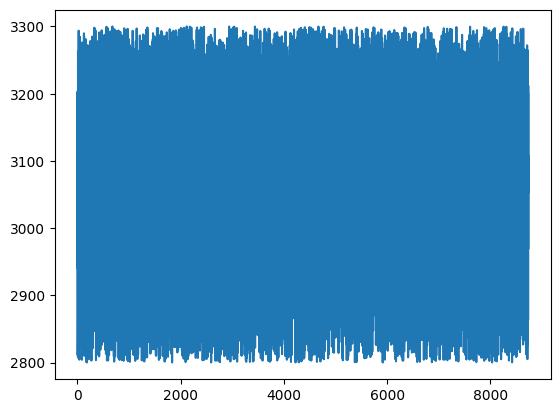

In [5]:
import numpy as np
#analisando tamanho do df
n = df.shape[0]

# Criando vetor de valores aleatórios em m³
atvMax = 3300 
atvMin = 2800
#monte carlo para a taxa de atividade
ativ = (atvMax - atvMin)*np.random.rand(n) + atvMin
#criando coluna para atividade
df['Atividade']=ativ

# Criando uma figura com os valores aleatórios
fig, ax= plt.subplots()
ax.plot(ativ)
print(df)

#salvando como .csv no pc
df.to_csv(r"C:\UFSC\ENS410064\tabelas\TxAtiv.csv")

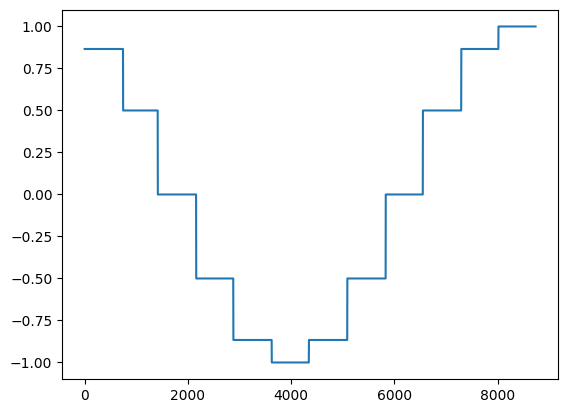

In [6]:
#Criando componente sazonal

sazonal = np.cos((2*np.pi)*df['Mes']/12)
plt.plot(sazonal)
df['sazonalidade']=sazonal+1
df.to_csv(r"C:\UFSC\ENS410064\tabelas\sazonal.csv")

,Data,Mes,Hora,Atividade,sazonalidade,randomSazonal
0,2023-01-01 00:00:00,1,0,3103.546990,1.866025,5791.297525
1,2023-01-01 01:00:00,1,1,3103.660180,1.866025,5791.508741
2,2023-01-01 02:00:00,1,2,2940.659233,1.866025,5487.344833
3,2023-01-01 03:00:00,1,3,3203.194348,1.866025,5977.242026
4,2023-01-01 04:00:00,1,4,3057.170483,1.866025,5704.757786
...,...,...,...,...,...,...
8732,2023-12-30 20:00:00,12,20,2863.469928,2.000000,5726.939856
8733,2023-12-30 21:00:00,12,21,3108.711785,2.000000,6217.423570
8734,2023-12-30 22:00:00,12,22,2968.864275,2.000000,5937.728549
8735,2023-12-30 23:00:00,12,23,3211.812158,2.000000,6423.624316


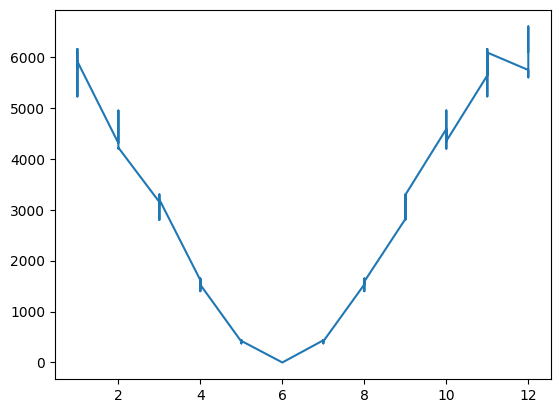

In [12]:
# aplicando a sazonalidade
df['randomSazonal'] = df['Atividade'] * df ['sazonalidade']
plt.plot(df['Mes'], df['randomSazonal'])
df.to_csv(r"C:\UFSC\ENS410064\tabelas\taxaDEatividadeFIM.csv")
df

##### Estimando as emissões com a taxa de variação detalhada

In [13]:
# importando as bibliotecas que serão utilizadas
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# Diretório para o csv
path = r"C:\UFSC\ENS410064\tabelas"
print(path)

# Indicando nome do arquivo
name = 'TaxaDEatividadeFIM'
file = str(name)+'.csv'
print(file)

# Abrindo arquivo utilizando o Pandas
#uso do encoding latin1 porque ele não estava identificando sozinho
AtvVariada = pd.read_csv(path+'\\'+file, encoding = 'latin1')
AtvVariada

AtvVariada

C:\UFSC\ENS410064\tabelas
TaxaDEatividadeFIM.csv


,Unnamed: 0,Data,Mes,Hora,Atividade,sazonalidade,randomSazonal
0,0,2023-01-01 00:00:00,1,0,3103.546990,1.866025,5791.297525
1,1,2023-01-01 01:00:00,1,1,3103.660180,1.866025,5791.508741
2,2,2023-01-01 02:00:00,1,2,2940.659233,1.866025,5487.344833
3,3,2023-01-01 03:00:00,1,3,3203.194348,1.866025,5977.242026
4,4,2023-01-01 04:00:00,1,4,3057.170483,1.866025,5704.757786
...,...,...,...,...,...,...,...
8732,8732,2023-12-30 20:00:00,12,20,2863.469928,2.000000,5726.939856
8733,8733,2023-12-30 21:00:00,12,21,3108.711785,2.000000,6217.423570
8734,8734,2023-12-30 22:00:00,12,22,2968.864275,2.000000,5937.728549
8735,8735,2023-12-30 23:00:00,12,23,3211.812158,2.000000,6423.624316


In [14]:
AtvVariada['randomSazonal'].sum()

26509192.462572843

1


KeyError: 'Source'

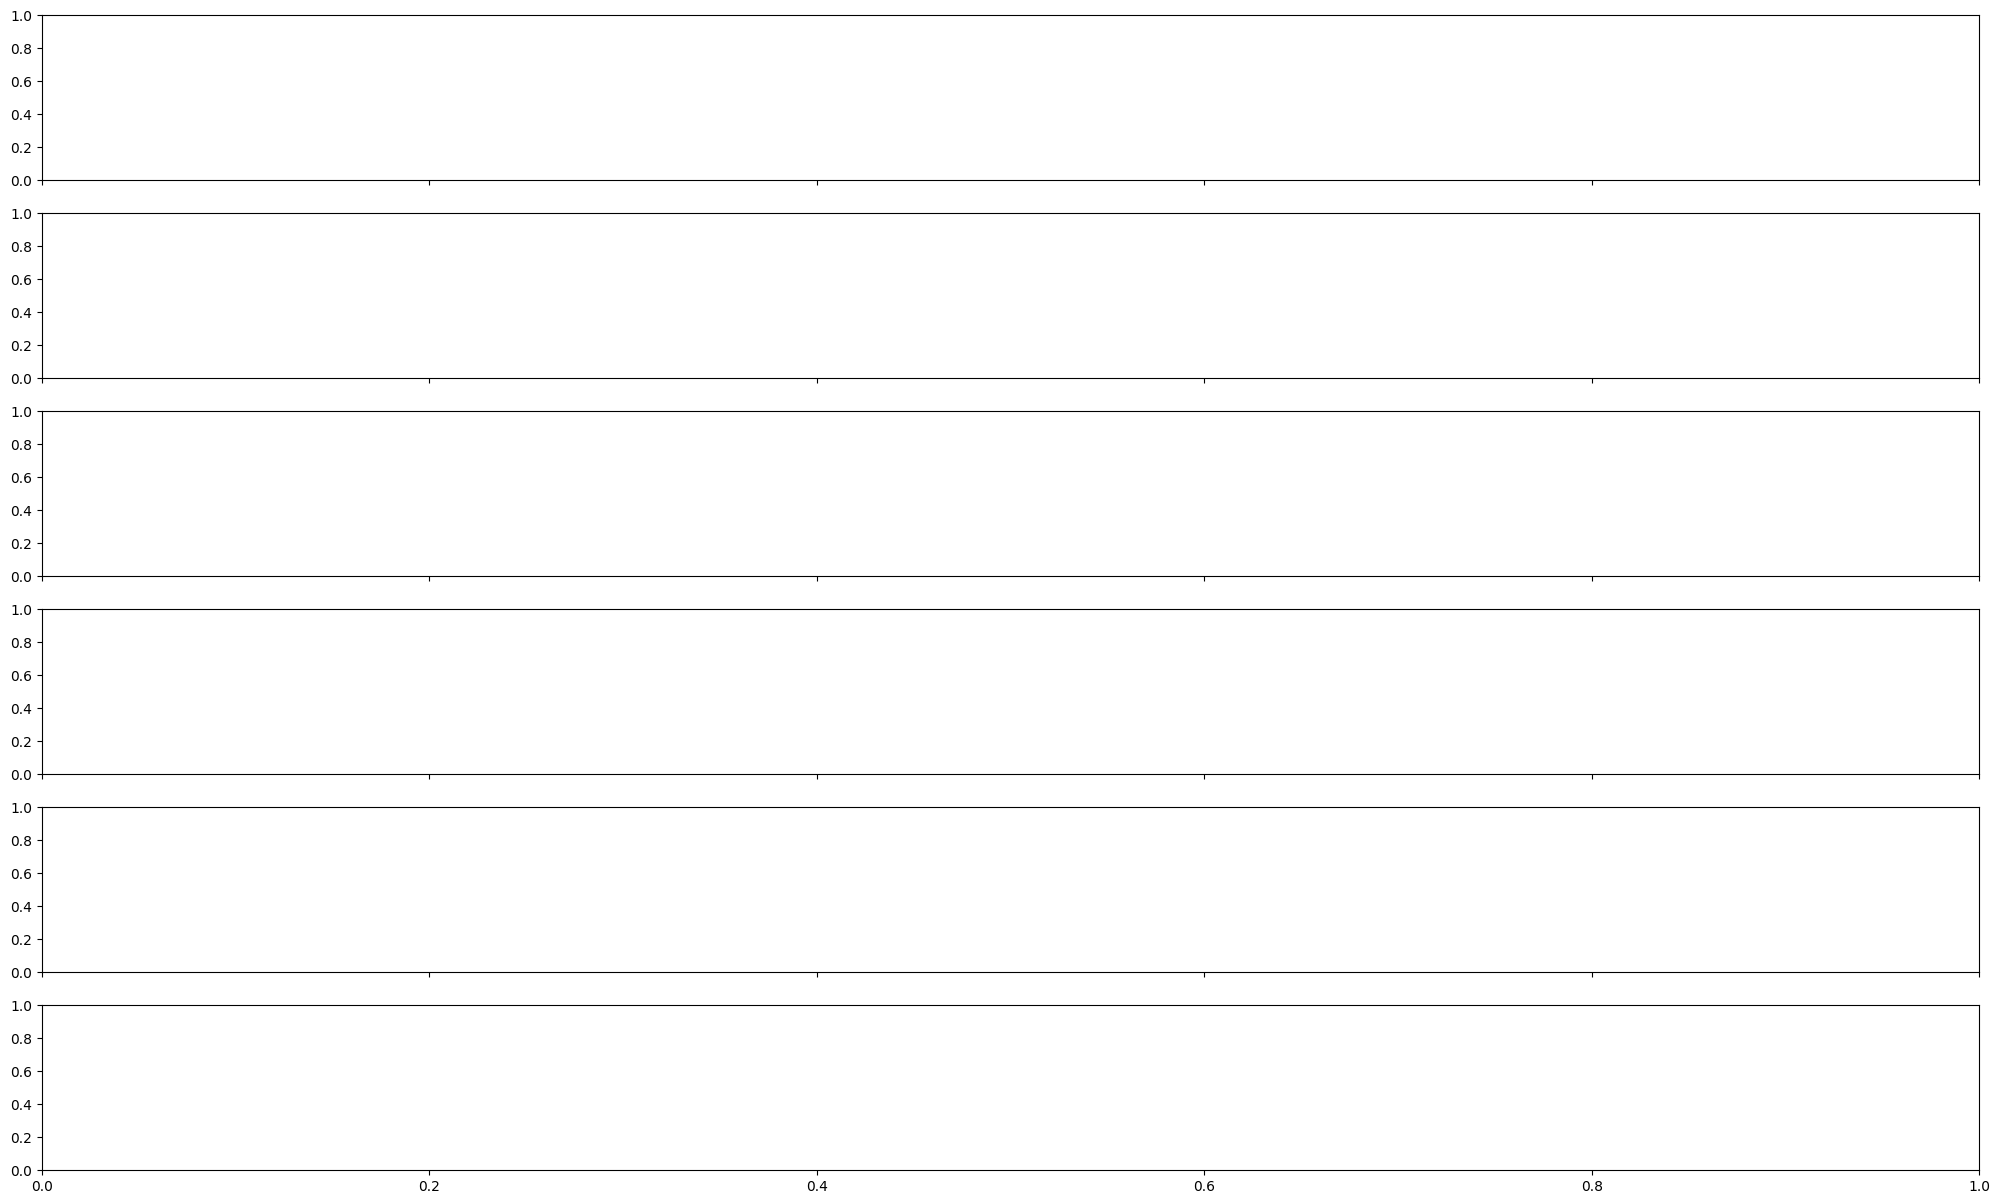

In [18]:
fig,ax = plt.subplots(len(AtvVariada.columns)-1,1,sharex = True,figsize=(25, 15))

# Loop para preencher o subplot com os gráficos de barra
for ii in range(1,len(AtvVariada.columns)):
    print(ii)
    ax[ii-1].bar(AtvVariada['Source'],AtvVariada.iloc[:,ii],color = ['blue','red','cyan'])
    ax[ii-1].set_xlabel('Processo', fontsize=8)
    ax[ii-1].set_ylabel(AtvVariada.columns[ii]+'\n(g/s)', fontsize=8) 